In [588]:
import pandas as pd 
import numpy as np

In [589]:
data=pd.read_csv("housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [590]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [591]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [592]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [593]:
data=data.drop_duplicates()

In [594]:
data.dropna(inplace=True)

In [595]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


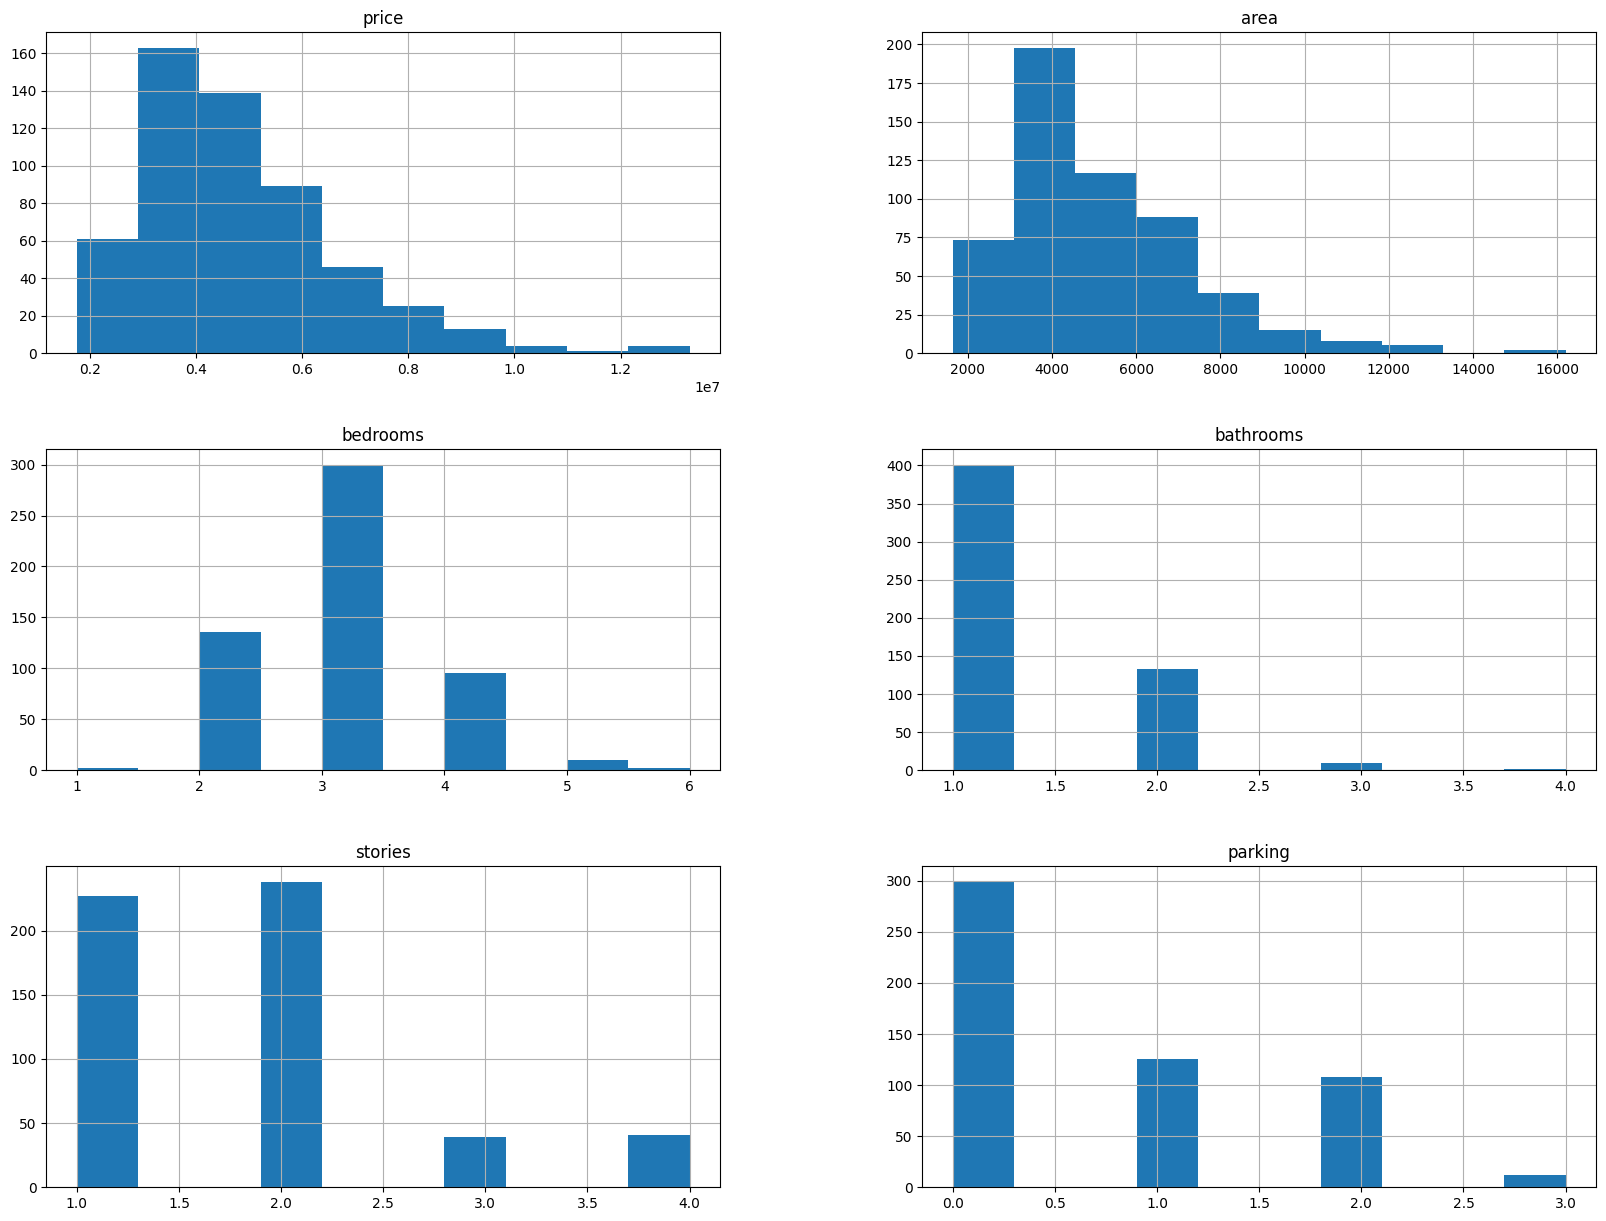

In [596]:
data.hist(bins=10,figsize=(20,15))
plt.show()

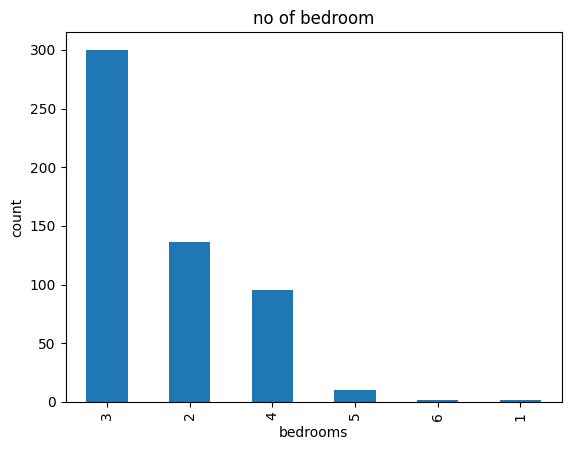

In [597]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('no of bedroom')
plt.xlabel("bedrooms")
plt.ylabel("count")
plt.show()
#visualizing number of rooms similar approach can be used to see the count of other features/columns values.

In [598]:
!pip3 install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [599]:
#label encoding categorical variables
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['mainroad']=le.fit_transform(data['mainroad'])
data['guestroom']=le.fit_transform(data['guestroom'])
data['basement']=le.fit_transform(data['basement'])
data['hotwaterheating']=le.fit_transform(data['hotwaterheating'])
data['prefarea']=le.fit_transform(data['prefarea'])
data['airconditioning']=le.fit_transform(data['airconditioning'])
data['furnishingstatus']=le.fit_transform(data['furnishingstatus'])





In [600]:
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,2
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,2


In [601]:
#split btw descriptive feature & target feature
x=data.drop(columns='price',axis=1)
y=data.price

In [602]:
print(x)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0              

In [603]:
print(y)

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


In [604]:
#splitting the data btw train & test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [605]:
print(x.shape,x_train.shape,x_test.shape)

(545, 12) (436, 12) (109, 12)


In [606]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_train=pd.DataFrame(x_train)
display(x_train.describe().T)
x_test=sc.transform(x_test)
x_test=pd.DataFrame(x_test)
display(x_test.describe().T)

,count,mean,std,min,25%,50%,75%,max
0,436.0,4.481634e-17,1.001149,-1.540198,-0.738991,-0.293359,0.593251,5.144981
1,436.0,7.639149e-17,1.001149,-2.665645,-1.293483,0.078679,0.078679,4.195165
2,436.0,-1.201893e-16,1.001149,-0.579897,-0.579897,-0.579897,1.410929,5.392582
3,436.0,9.370690e-17,1.001149,-0.929023,-0.929023,0.205582,0.205582,2.474792
4,436.0,-1.588943e-16,1.001149,-2.503331,0.399468,0.399468,0.399468,0.399468
5,436.0,-8.148426e-18,1.001149,-0.455803,-0.455803,-0.455803,-0.455803,2.193931
6,436.0,0.000000e+00,1.001149,-0.738985,-0.738985,-0.738985,1.353207,1.353207
7,436.0,-4.481634e-17,1.001149,-0.241355,-0.241355,-0.241355,-0.241355,4.143268
8,436.0,4.787200e-17,1.001149,-0.655369,-0.655369,-0.655369,1.525859,1.525859
9,436.0,-1.222264e-17,1.001149,-0.849261,-0.849261,-0.849261,0.311484,2.632974


,count,mean,std,min,25%,50%,75%,max
0,109.0,0.012148,1.049393,-1.626765,-0.705249,-0.090905,0.537402,4.865734
1,109.0,0.154211,1.053562,-1.293483,0.078679,0.078679,1.450841,2.823003
2,109.0,-0.050227,1.000642,-0.579897,-0.579897,-0.579897,-0.579897,3.401756
3,109.0,-0.075467,0.915477,-0.929023,-0.929023,0.205582,0.205582,2.474792
4,109.0,-0.053262,1.058060,-2.503331,0.399468,0.399468,0.399468,0.399468
5,109.0,0.079006,1.068435,-0.455803,-0.455803,-0.455803,-0.455803,2.193931
6,109.0,-0.028792,0.995276,-0.738985,-0.738985,-0.738985,1.353207,1.353207
7,109.0,-0.201129,0.419971,-0.241355,-0.241355,-0.241355,-0.241355,4.143268
8,109.0,0.165093,1.061505,-0.655369,-0.655369,-0.655369,1.525859,1.525859
9,109.0,-0.220968,0.980508,-0.849261,-0.849261,-0.849261,0.311484,2.632974


In [607]:
from sklearn.linear_model import LinearRegression

In [608]:
model=LinearRegression()
model.fit(x_train,y_train)
print("intercept:",model.intercept_)
print('coefficient:',model.coef_)


intercept: 4795729.220183486
coefficient: [ 519133.19986781   68204.89117936  572021.12426732  357929.45755119
  198364.884442    144812.91379091  135349.13723893  196800.72979262
  383631.66134561  210927.4461343   254325.95813638 -167421.42511616]


In [609]:
#predicting test set results
y_pred=model.predict(x_test)
print("test set prediction:",y_pred)

test set prediction: [3909079.36337597 6664207.45687045 5533066.52012756 5165501.99831349
 4736760.95379701 3850890.41214154 8238481.43649973 5683903.46232367
 3534290.6807371  5763202.24873778 2897586.32777537 6397036.95721688
 4735540.96607787 7299886.01899914 5738455.81897481 6819934.74319818
 8331545.1840402  4345424.87277819 6135133.17038379 5037840.6611776
 4315070.27799247 2776480.66522138 4675383.15592279 3560379.60189053
 2724254.14611634 3497655.19828845 5120118.13709642 6650721.50133493
 6717960.70175181 4926506.90699322 3000044.70131414 4471629.07413724
 3038988.37752922 2772974.79907464 4756127.09540633 4728716.55961087
 4692468.04819259 3380459.1874572  3490315.84867766 4241810.95200957
 3057095.56926714 5968492.54136357 5917322.34681701 2970899.58344938
 2661435.3174168  4424350.62486814 4556681.15760607 5272803.69272726
 3197963.28247013 6146362.19206375 2018611.00158592 6580176.22464148
 5937462.01920249 6440358.30795621 7129424.52229285 5015737.36200267
 6101953.96293

In [610]:
val_data = pd.DataFrame({'Actual value': (y_test)/10000, 'Predict value': (y_pred)*0.0001})
val_data.head(20)

,Actual value,Predict value
265,440.3,390.907936
54,735.0,666.420746
171,525.0,553.306652
244,455.0,516.550200
268,438.2,473.676095
231,469.0,385.089041
25,854.0,823.848144
169,525.0,568.390346
494,273.0,353.429068
120,595.0,576.320225


In [611]:
from sklearn.linear_model import Ridge
r = Ridge()

r.fit(x_train, y_train)
r_pred = r.predict(x_test)

print(r2_score(y_test, r_pred))

0.6764693079757378


In [612]:
from sklearn.linear_model import Lasso
l = Lasso()

l.fit(x_train, y_train)
l_pred = l.predict(x_test)

print(r2_score(y_test, l_pred))

0.6763309210568245


In [613]:
from sklearn.metrics import r2_score,mean_absolute_error
# R SQUARED ERROR
score_1=r2_score(y_train,training_data_prediction)
# MEAN ABSOLUTE ERROR
score_2=mean_absolute_error(y_train,training_data_prediction)
print("R SQUARED ERROR:",score_1)
print("MEAN ABSOLUTE ERROR:",score_2)

R SQUARED ERROR: 0.6773324472457776
MEAN ABSOLUTE ERROR: 780985.8174214995


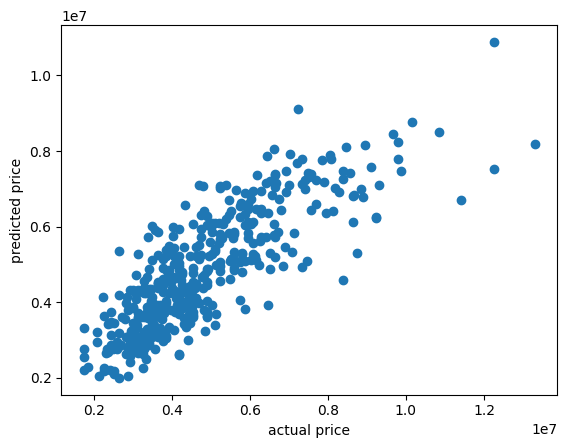

In [614]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.show()

In [615]:
test_data_prediction=model.predict(x_test)

In [616]:
residual=y_test-test_data_prediction

In [617]:
from sklearn.metrics import r2_score,mean_absolute_error
# R SQUARED ERROR
score_1=r2_score(y_test,test_data_prediction)
# MEAN ABSOLUTE ERROR
score_2=mean_absolute_error(y_test,test_data_prediction)
print("R SQUARED ERROR:",score_1)
print("MEAN ABSOLUTE ERROR:",score_2)

R SQUARED ERROR: 0.6763309062082214
MEAN ABSOLUTE ERROR: 785186.8004311102


 DRAWING LINEAR-REGRESSION-ASSUMPTIONS

Text(0.5, 1.0, 'prics vs area')

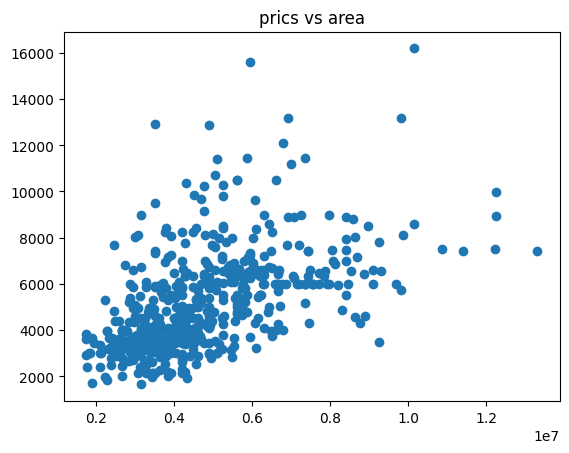

In [618]:
plt.scatter(data.price,data.area)
plt.title('prics vs area')
#checking linear/non linear relation btw features

In [619]:
!pip3 install statsmodels

Defaulting to user installation because normal site-packages is not writeable


ABOVE PLOT SHOWS LINEAR RELATION BTW PRICE & AREA

In [620]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[]
for i in range(x_train.shape[1]):
    vif.append(variance_inflation_factor(x_train,i))

CHECKING IF MULTI-COLLINEARITY EXCITS OR NOT
VIF SHOULD BE LESS THAN OR ELSE DROP THAT PARTICULAR FEATURE.

In [621]:
pd.DataFrame({'vif':vif},index=data.columns[0:12]).T

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
vif,1.328269,1.379135,1.304862,1.491799,1.177169,1.218309,1.32059,1.049594,1.203064,1.197732,1.12517,1.076277


CHECK DATA IS NORMALLY DISTRIBUTED

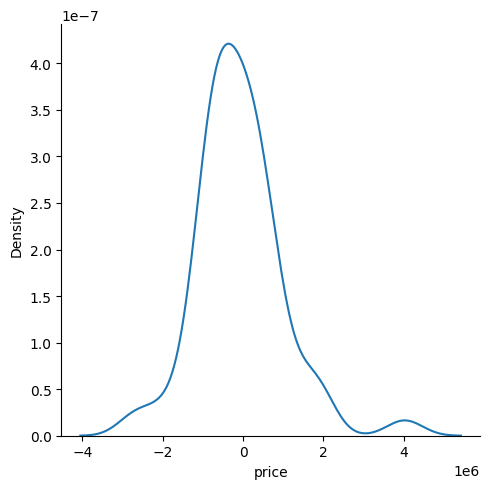

In [622]:
sns.displot(residual,kind='kde')


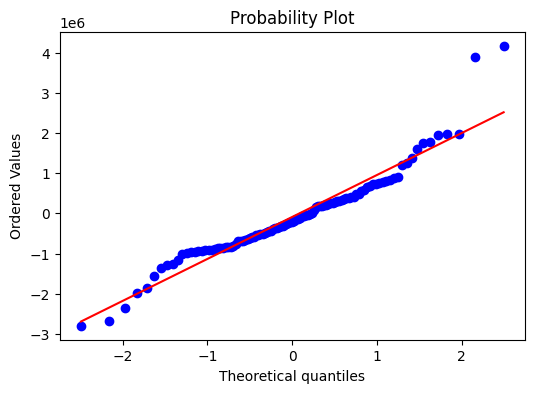

In [623]:
import scipy as sp 
fig,ax=plt.subplots(figsize=(6,4))
sp.stats.probplot(residual,plot=ax,fit=True)
plt.show()
#QQPLOT

HOMOSCEDASTICITY->HAVING SAME SCATTER 

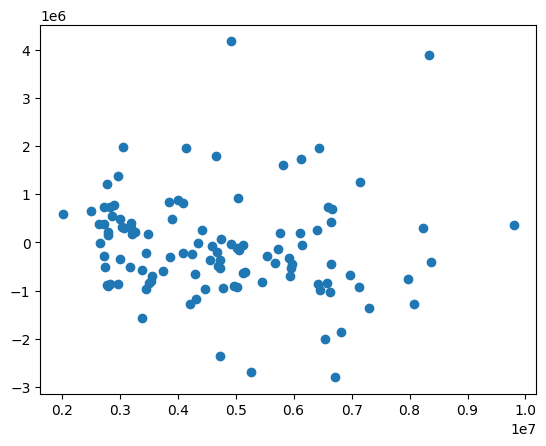

In [624]:
plt.scatter(y_pred,residual)

AUTOCORRELATION OF RESIDUALS-> NO PATTERNED REGULARITY IN THE 

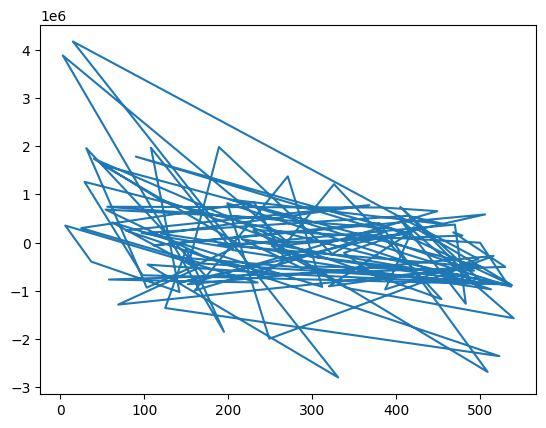

In [625]:
plt.plot(residual)